<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-10-22 21:55:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M   329KB/s    in 2m 39s  

2024-10-22 21:57:54 (226 KB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [23]:
query = '''select * from master'''
df = pd.read_sql_query(query,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

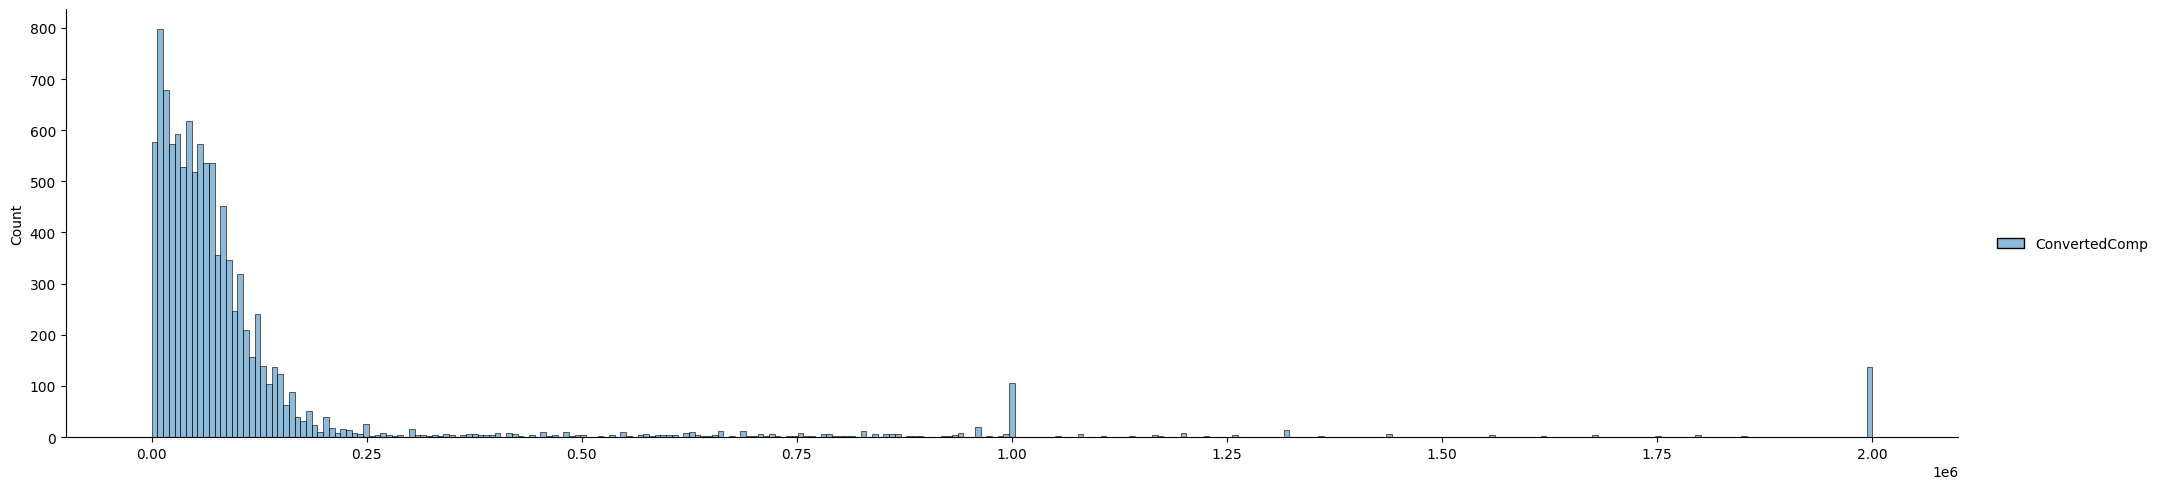

In [4]:
# your code goes here
query='''select ConvertedComp from master'''
df = pd.read_sql_query(query,conn)
sns.displot(df,height = 5, aspect = 4)

### Box Plots


Plot a box plot of `Age.`


<Axes: >

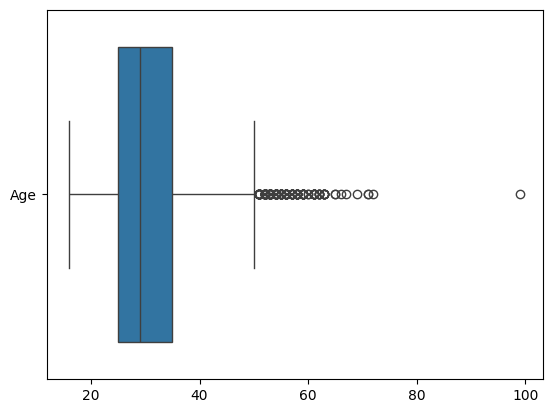

In [5]:
# your code goes here
query = '''
select Age from master'''
df = pd.read_sql_query(query,conn)
sns.boxplot(df,orient='h')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


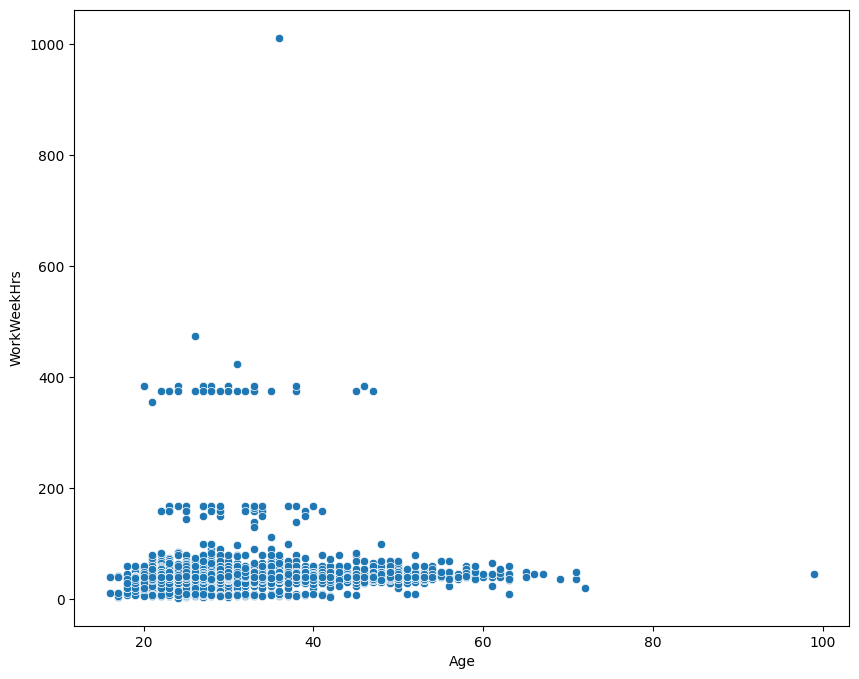

In [6]:
# your code goes here
query = '''select Age, WorkWeekHrs from master'''
df = pd.read_sql_query(query,conn)
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Age', y = 'WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


        Age  WorkWeekHrs  CodeRevHrs
0      22.0         80.0         NaN
1      23.0         32.0        12.0
2      28.0         40.0         5.0
3      26.0         40.0         NaN
4      29.0         45.0         5.0
...     ...          ...         ...
11393  36.0         40.0         NaN
11394  25.0         40.0         5.0
11395  34.0         40.0         5.0
11396  25.0         42.5         2.0
11397  30.0         80.0         1.0

[11398 rows x 3 columns]


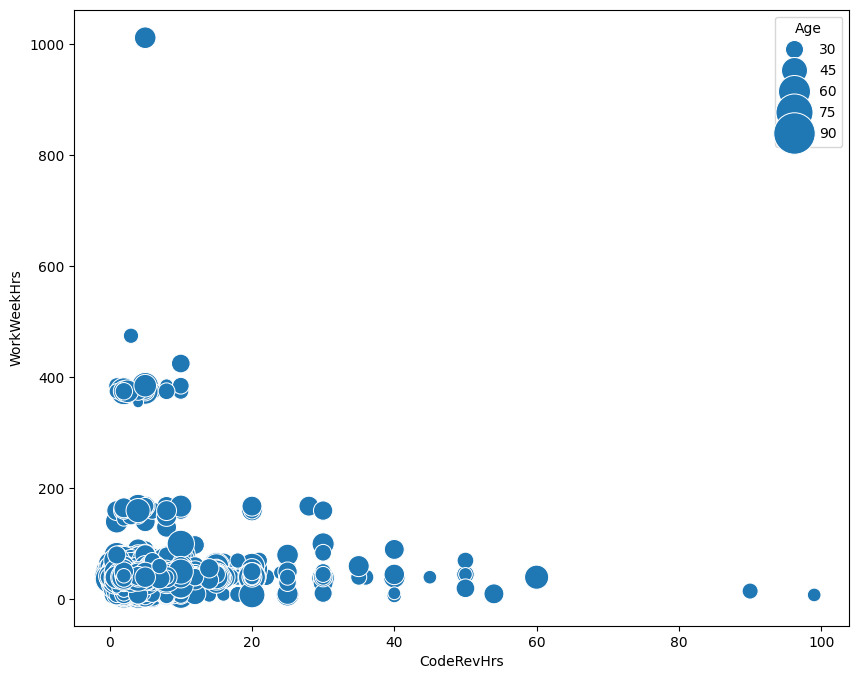

In [8]:
# your code goes here
query = '''select Age,WorkWeekHrs,CodeRevHrs from master'''
df = pd.read_sql_query(query,conn)
print(df)
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,y='WorkWeekHrs',x = 'CodeRevHrs', size = 'Age', alpha = 1, sizes = (1,1000))
plt.show()

## Visualizing composition of data


In [26]:
# printing the master table we we can get better understanding
query = '''select * from sqlite_master'''
df = pd.read_sql_query(query,conn)
df

,type,name,tbl_name,rootpage,sql
0,table,EduOther,EduOther,2,"CREATE TABLE ""EduOther"" (\n""Respondent"" INTEGE..."
1,table,DevType,DevType,741,"CREATE TABLE ""DevType"" (\n""Respondent"" INTEGER..."
2,table,LastInt,LastInt,1024,"CREATE TABLE ""LastInt"" (\n""Respondent"" INTEGER..."
3,table,JobFactors,JobFactors,1355,"CREATE TABLE ""JobFactors"" (\n""Respondent"" INTE..."
4,table,WorkPlan,WorkPlan,1808,"CREATE TABLE ""WorkPlan"" (\n""Respondent"" INTEGE..."
5,table,WorkChallenge,WorkChallenge,2088,"CREATE TABLE ""WorkChallenge"" (\n""Respondent"" I..."
6,table,LanguageWorkedWith,LanguageWorkedWith,2378,"CREATE TABLE ""LanguageWorkedWith"" (\n""Responde..."
7,table,LanguageDesireNextYear,LanguageDesireNextYear,2638,"CREATE TABLE ""LanguageDesireNextYear"" (\n""Resp..."
8,table,DatabaseWorkedWith,DatabaseWorkedWith,2877,"CREATE TABLE ""DatabaseWorkedWith"" (\n""Responde..."
9,table,DatabaseDesireNextYear,DatabaseDesireNextYear,3028,"CREATE TABLE ""DatabaseDesireNextYear"" (\n""Resp..."


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x6fffd2a7bb80>,
 [Text(0.8535937566577692, 0.8434320948332933, 'PostgreSQL'),
  Text(-0.6614558538043755, 0.8789062256395301, 'MongoDB'),
  Text(-1.0401617758478325, -0.35785958149123726, 'Redis'),
  Text(-0.05356333651009637, -1.0986951210330855, 'MySQL'),
  Text(0.9576877798968915, -0.5411414937298409, 'Elasticsearch')],
 [Text(0.49792969138369864, 0.4920020553194211, '24.8%'),
  Text(-0.36079410207511386, 0.47940339580338004, '20.9%'),
  Text(-0.5673609686442722, -0.1951961353588567, '19.1%'),
  Text(-0.02921636536914347, -0.5992882478362284, '18.8%'),
  Text(0.5223751526710316, -0.2951680874890041, '16.4%')])

<Figure size 1000x800 with 0 Axes>

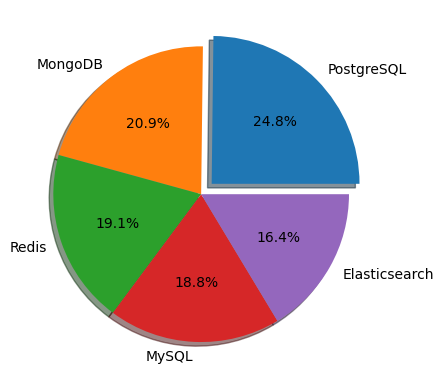

In [9]:
# your code goes here
query = '''
select * , count(*) as count from DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc
limit 5'''
df = pd.read_sql_query(query,conn)
data = df['count']
labels = df['DatabaseDesireNextYear']
plt.figure(figsize = (10,8))
fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct = '%1.1f%%', explode = (0.1,0,0,0,0), shadow=True)

   Respondent     LanguageWorkedWith  count
0           9             JavaScript   8687
1           9               HTML/CSS   7830
2           4                    SQL   7106
3           9  Bash/Shell/PowerShell   4642
4           4                 Python   4542


<Figure size 1000x800 with 0 Axes>

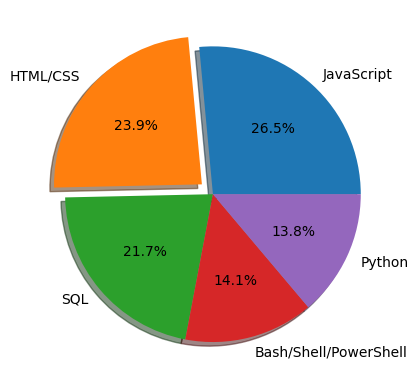

In [14]:
query = '''select * , count(*) as count from LanguageWorkedWith group by LanguageWorkedWith order by count desc limit 5'''
df = pd.read_sql_query(query,conn)
print(df)
data = df['count']
labels = df['LanguageWorkedWith']
plt.figure(figsize = (10,8))
fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%', explode=(0,0.1,0,0,0), shadow = True)
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 1000x800 with 0 Axes>

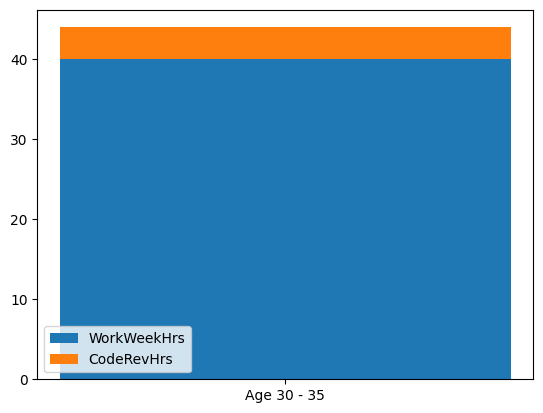

In [15]:
# your code goes here
query = '''select WorkWeekHrs, CodeRevHrs, Age
from master
where Age between 30 and 35
'''
df = pd.read_sql_query(query,conn)
work_week = df['WorkWeekHrs'].quantile(0.5)
code_rev = df['CodeRevHrs'].quantile(0.5)
plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
ax.bar('Age 30 - 35', work_week, label='WorkWeekHrs')
ax.bar('Age 30 - 35', code_rev, bottom=work_week, label='CodeRevHrs')
ax.legend()
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


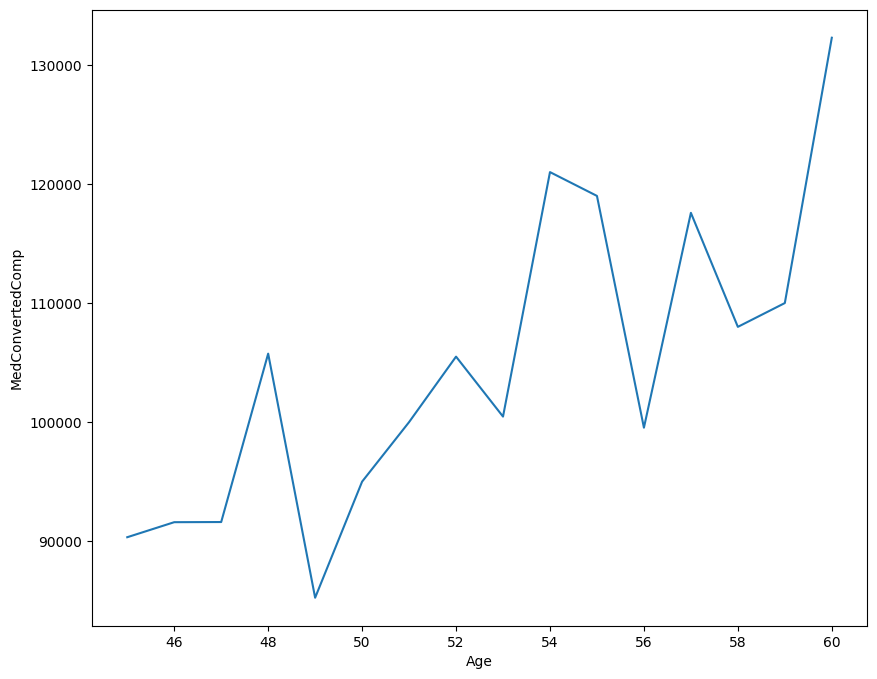

In [17]:
# your code goes here
query = ''' select ConvertedComp, Age
from master
where Age between 45 and 60'''
df = pd.read_sql_query(query,conn)
medians = df.groupby('Age')['ConvertedComp'].median()
data = pd.DataFrame(list(zip(medians.index, medians.values)),
                   columns=['Age','MedConvertedComp'])
plt.figure(figsize=(10,8))
sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


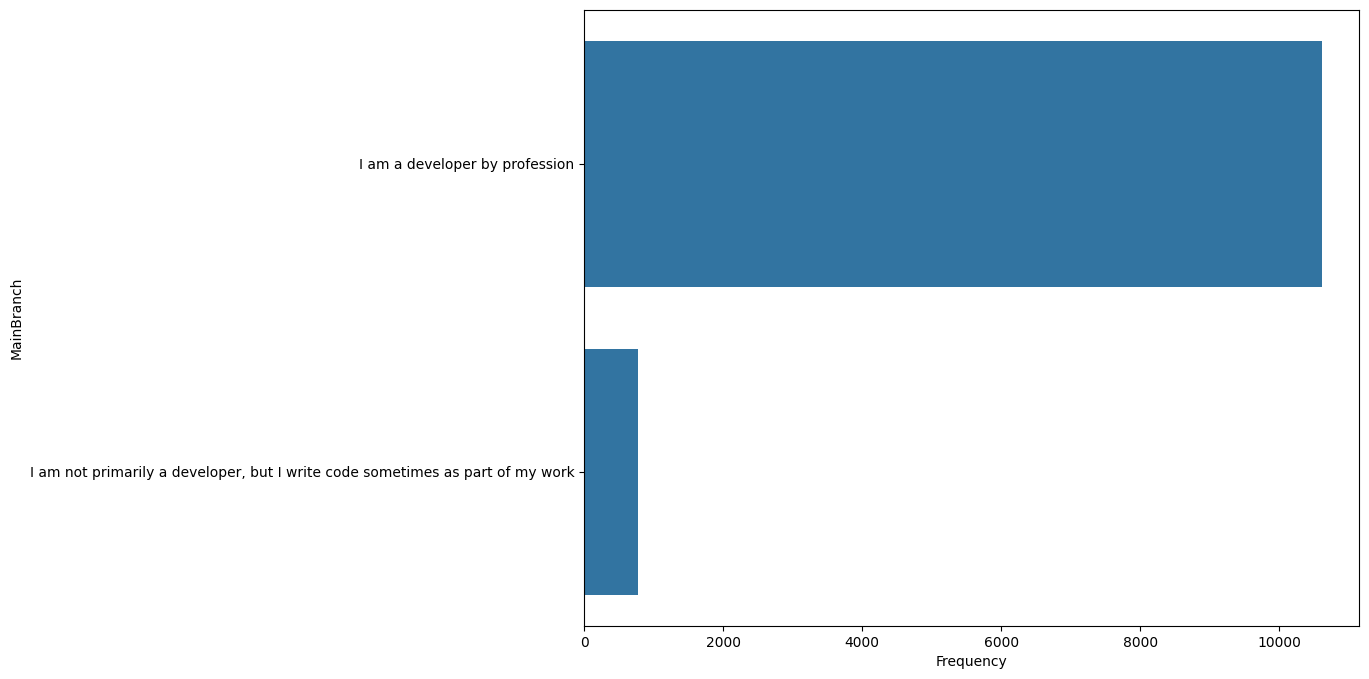

In [18]:
# your code goes here
query = '''select MainBranch, count(*) as Frequency
from master 
group by MainBranch'''
df = pd.read_sql_query(query,conn)
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Frequency',y = 'MainBranch',orient='h')
plt.show()


Close the database connection.


In [19]:
conn.close()

 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
